In [74]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import imblearn
import seaborn as sns
import dill as pickle

import importlib
import Projet7_utils as utils
importlib.reload(utils)

<module 'Projet7_utils' from 'e:\\Git\\OpenClassrooms_Projet7\\Projet7_utils.py'>

In [35]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df = pd.read_csv(os.path.join(PATH, "application_train.csv"))

###### The individuals who were able to pay are labelled as 0, while those whà were not are labelled as 1, which is counter-intuitive. We swap the 1s and 0s, so that 1s are actual positives and 0s are actual negatives

In [36]:
importlib.reload(utils)
df['TARGET'] = utils.set_0_to_1(df['TARGET'])
df['TARGET'].value_counts()

1    282686
0     24825
Name: TARGET, dtype: int64

### Check duplicates

In [37]:
print(df.shape)
print(df.drop_duplicates().shape)

(307511, 122)
(307511, 122)


In [38]:
print(df['SK_ID_CURR'].shape)
print(df['SK_ID_CURR'].drop_duplicates().shape)

(307511,)
(307511,)


###### No duplicates

# Cleaning, feature engineering

## Delete irrelevant features

In [39]:
to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

df = df.drop(to_drop, axis=1)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       0         Cash loans           M            N   
1           100003       1         Cash loans           F            N   
2           100004       1    Revolving loans           M            Y   
3           100006       1         Cash loans           F            N   
4           100007       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       1         Cash loans           M            N   
307507      456252       1         Cash loans           F            N   
307508      456253       1         Cash loans           F            N   
307509      456254       0         Cash loans           F            N   
307510      456255       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                     0                0                 0                 0   
1                     0                0                 0                 0   
2                     0                0                 0                 0   
3                     0                0                 0                 0   
4                     0                0                 0                 0   
...                 ...              ...               ...               ...   
307506                0                0                 0                 0   
307507                0                0                 0                 0   
307508                0                0                 0                 0   
307509                0                0                 0                 0   
307510                0                0                 0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 

## Missing values

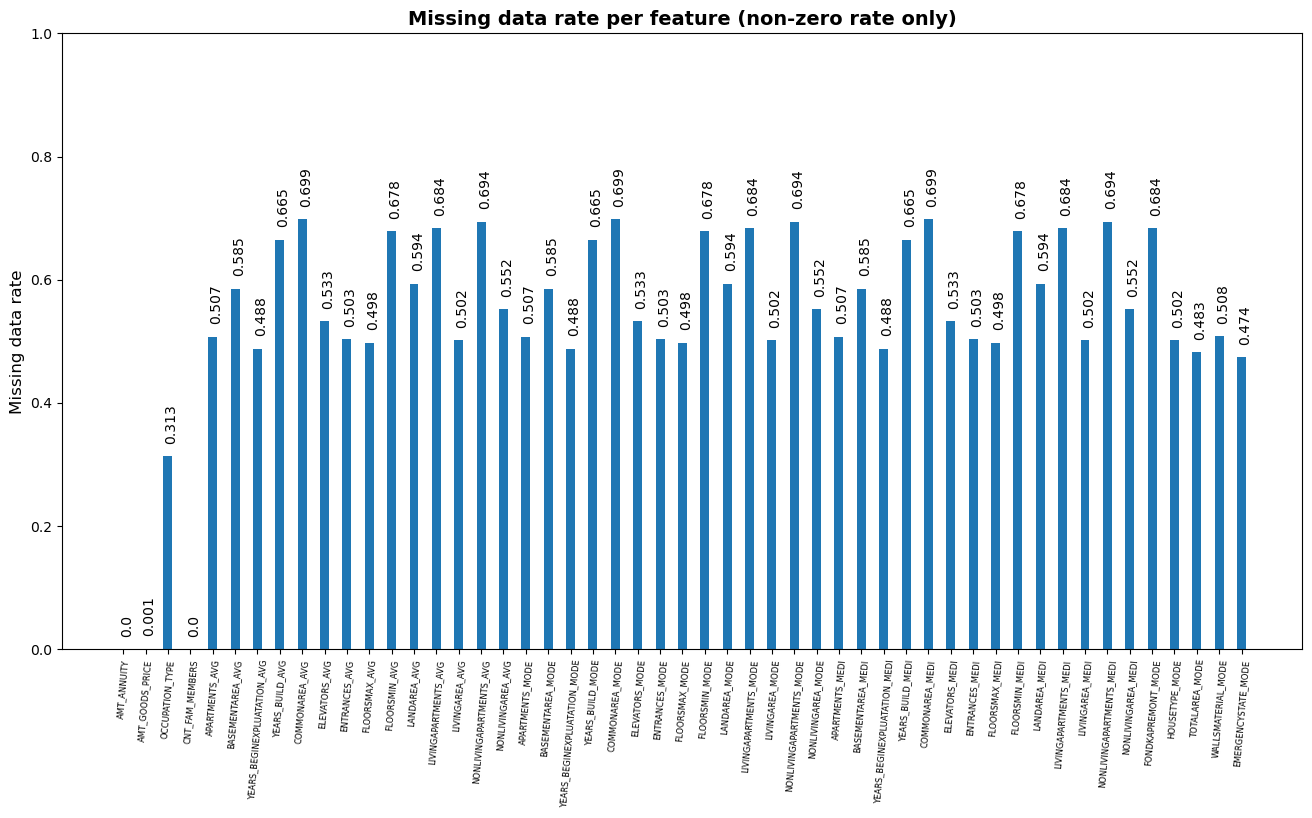

In [40]:
missing_value_rate_column = []
cols = []
for col in df.columns:
    r = df[col].isnull().sum()/df.shape[0]
    if r > 0:
        missing_value_rate_column.append(r)
        cols.append(col)

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(np.arange(len(missing_value_rate_column)), missing_value_rate_column, align='center', width=.4)
plt.xticks(np.arange(len(missing_value_rate_column)), cols)
plt.xticks(rotation=85, fontsize=6)

for i, d in enumerate(missing_value_rate_column):
    plt.text(x=i-.15, y=d+.025, s=f'{np.round(d, 3)}', rotation = 90)

plt.ylabel('Missing data rate', fontsize=12)
plt.title('Missing data rate per feature (non-zero rate only)', fontsize=14, fontweight='bold')
plt.ylim(0, 1)

plt.show()

#### Delete irrelevant features and features with too much missing data

In [41]:
maybe_drop = [
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_POPULATION_RELATIVE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE',
    'FONDKAPREMONT_MODE',
    'WALLSMATERIAL_MODE',
    'HOUSETYPE_MODE',
    'EMERGENCYSTATE_MODE',
    'OCCUPATION_TYPE'
]

df = df.drop(maybe_drop, axis=1)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       0         Cash loans           M            N   
1           100003       1         Cash loans           F            N   
2           100004       1    Revolving loans           M            Y   
3           100006       1         Cash loans           F            N   
4           100007       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       1         Cash loans           M            N   
307507      456252       1         Cash loans           F            N   
307508      456253       1         Cash loans           F            N   
307509      456254       0         Cash loans           F            N   
307510      456255       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0           24700.5  ...               Working  Secondary / secondary special   
1           35698.5  ...         State servant               Higher education   
2            6750.0  ...               Working  Secondary / secondary special   
3           29686.5  ...               Working  Secondary / secondary special   
4           21865.5  ...               Working  Secondary / secondary special   
...             ...  ...                   ...                            ...   
307506      27558.0  ...               Working  Secondary / secondary special   
307507      12001.5  ...             Pensioner  Secondary / secondary special   
307508      29979.0  ...               Working               Higher education   
307509      20205.0  ...  Commercial associate  Secondary / secondary special   
307510      49117.5  ...  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE DAYS_BIRTH  DAYS_EMPLOYED  \
0       Single / not married  House / apartment      -9461           -637   
1                    Married  House / apartment     -16765          -1188   
2       Single / not married  House / apartment     -19046           -225   
3             Civil marriage  House / apartment     -19005          -3039   
4       Single / not married  House / apartment     -19932          -3038   
...                      ...                ...        ...            ...   
307506             Separated       With parents      -9327           -236   
307507                 Widow  House / apartment     -20775         365243   
307508             Separated  House / apartment     -14966          -7921   
307509               Married  House / apartment     -11961          -4786   
307510               Married  House / apartment     -16856          -1262   

        FLAG_MOBIL  FLAG_EMAIL  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
0                1           0              1.0  Business Entity Type 3  
1                1           0              2.0                  School  
2                1           0              1.0              Government  
3                1           0              2.0  Business Entity Type 3  
4         

#### Drop rows with missing values in some specific features

In [42]:
ind = df.loc[df['AMT_ANNUITY'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['CNT_FAM_MEMBERS'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['AMT_GOODS_PRICE'].isna()].index
df = df.drop(ind, axis=0)

## Feature engineering

In [43]:
df['INCOME_CREDIT_RATE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

## Distributions and cleaning

### Code gender

<AxesSubplot:ylabel='CODE_GENDER'>

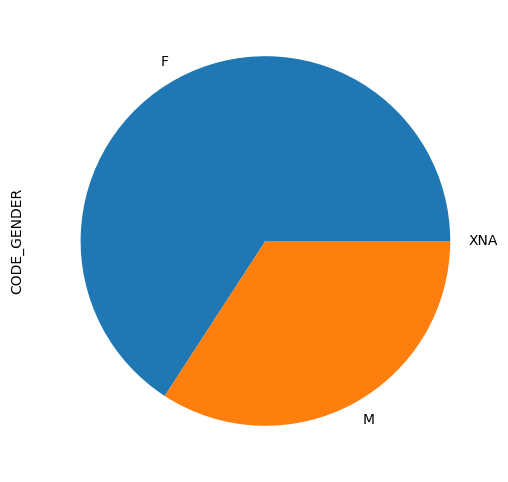

In [44]:
df['CODE_GENDER'].value_counts().plot(kind='pie', figsize=(6, 6))

In [45]:
# Delete rows with XNA = missing values
ind = df.loc[df['CODE_GENDER']=='XNA'].index
df = df.drop(ind, axis=0)

### Number of children

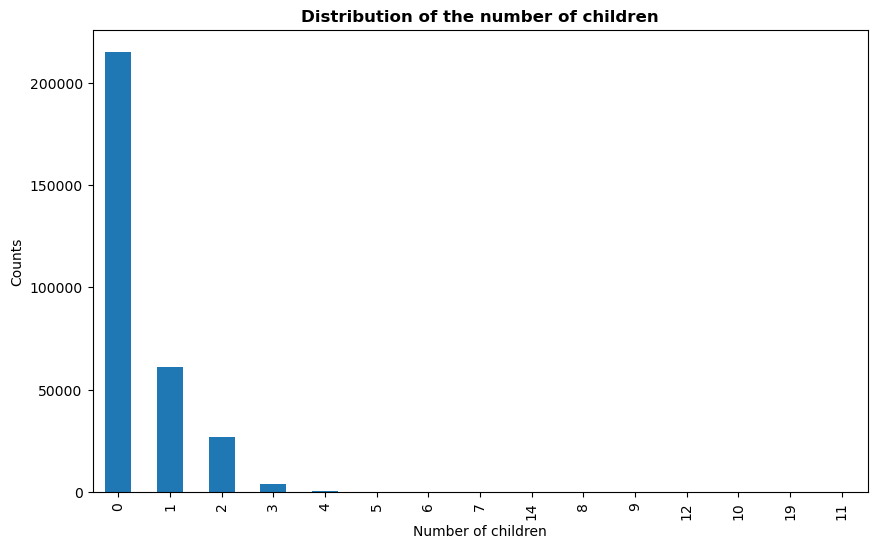

In [46]:
df['CNT_CHILDREN'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Counts')
plt.xlabel('Number of children')
plt.title('Distribution of the number of children', fontsize=12, fontweight='bold')
plt.show()

###### We delete rows where number of children is > 5 (outliers). These cannot be treated in the same way as the the other features (ie with interquartile analysis) beacause it would delete number > 2, while 3, 4 or even 5 children is still acceptable. Also it would delete too many individuals.

In [47]:
ind = df.loc[df['CNT_CHILDREN']>5].index
df = df.drop(ind, axis=0)

## Days employed

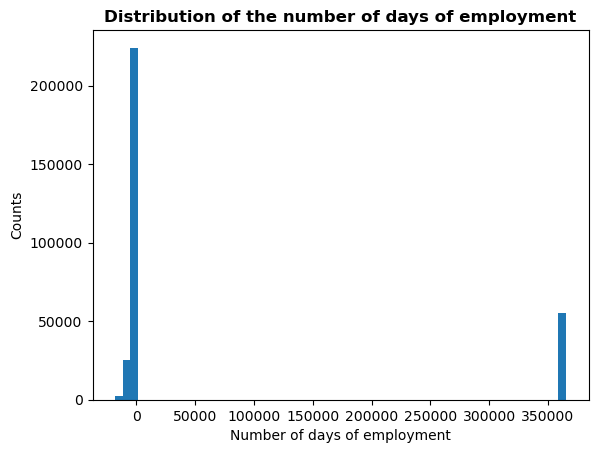

In [48]:
plt.hist(df['DAYS_EMPLOYED'], bins=60)
plt.ylabel('Counts')
plt.xlabel('Number of days of employment')
plt.title('Distribution of the number of days of employment', fontsize=12, fontweight='bold')
plt.show()

###### Max value = 365243, while all other values are < 0 -> equivalent to missing data. This value is well over-represented, and imputing it with the distribution mean for instance would raise the same problem. We notice that the rows with this value are the exact same ones where 'ORGANIZATION_TYPE' is also missing -> safer to delete them altogether

In [49]:
L1 = df.loc[df['ORGANIZATION_TYPE']=='XNA']['ORGANIZATION_TYPE'].index
L2 = df.loc[df['DAYS_EMPLOYED']==365243]['DAYS_EMPLOYED'].index

utils.diff_lists(L1, L2)

([], [])

In [50]:
ind = df.loc[df['DAYS_EMPLOYED']==365243].index
df = df.drop(ind, axis=0)

# Pass the values to positives
df['DAYS_EMPLOYED'] = - df['DAYS_EMPLOYED'] 

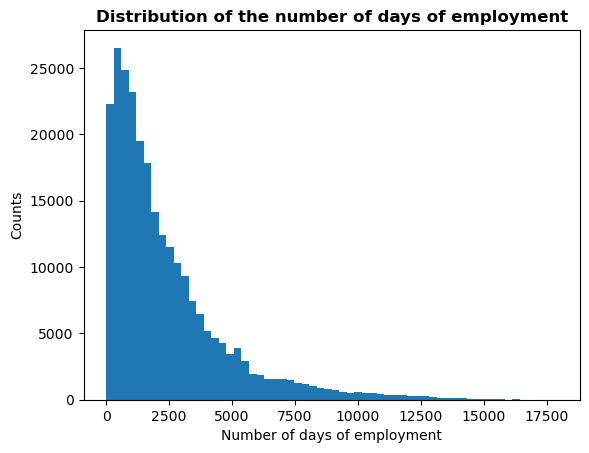

In [51]:
plt.hist(df['DAYS_EMPLOYED'], bins=60)
plt.ylabel('Counts')
plt.xlabel('Number of days of employment')
plt.title('Distribution of the number of days of employment', fontsize=12, fontweight='bold')
plt.show()

In [52]:
df.isnull().sum().sort_values(ascending=False).head()

SK_ID_CURR             0
TARGET                 0
ANNUITY_INCOME_RATE    0
INCOME_CREDIT_RATE     0
ORGANIZATION_TYPE      0
dtype: int64

In [53]:
df.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'INCOME_CREDIT_RATE',
 'ANNUITY_INCOME_RATE',
 'PAYMENT_RATE']

## Outliers + Training imputers

#### Continuous variables -> imputers with mean value

In [54]:
importlib.reload(utils)

List_continuous = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'INCOME_CREDIT_RATE',
    'ANNUITY_INCOME_RATE',
    'PAYMENT_RATE'    
]

for i in List_continuous:
    df[i] = utils.set_outlier_nan(df[i])

df[List_continuous], imputer_mean = utils.imput(df, List_continuous, 'mean')

e:\Git\OpenClassrooms_Projet7\Projet7_utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[i]=float('nan')  #set to NaN


#### Categorical variables -> imputers with most frequent value

In [55]:
importlib.reload(utils)

List_categorical = [
    'CNT_CHILDREN',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'FLAG_MOBIL',
    'FLAG_EMAIL',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE'  
]

for i in List_categorical:
    df[i] = utils.set_outlier_nan(df[i])

df[List_categorical], imputer_most_frequent = utils.imput(df, List_categorical, 'most_frequent')

e:\Git\OpenClassrooms_Projet7\Projet7_utils.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[i]=float('nan')  #set to NaN


In [56]:
# Create dictionary containing the imputers
imputers_dict = {
    'imputer_mean': imputer_mean,
    'imputer_most_frequent': imputer_most_frequent
}

# Save in pickle format
#pickle.dump(imputers_dict, open('API/Pickled_objects/imputers.pkl', 'wb'))

In [36]:
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           0         Cash loans           M            N   
100003           1         Cash loans           F            N   
100004           1    Revolving loans           M            Y   
100006           1         Cash loans           F            N   
100007           1         Cash loans           M            N   
...            ...                ...         ...          ...   
456248           1         Cash loans           F            N   
456251           1         Cash loans           M            N   
456253           1         Cash loans           F            N   
456254           0         Cash loans           F            N   
456255           1         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y           0.0          202500.0    406597.5   
100003                   N           0.0          270000.0   1293502.5   
100004                   Y           0.0           67500.0    135000.0   
100006                   Y           0.0          135000.0    312682.5   
100007                   Y           0.0          121500.0    513000.0   
...                    ...           ...               ...         ...   
456248                   Y           0.0          153000.0    331920.0   
456251                   N           0.0          157500.0    254700.0   
456253                   Y           0.0          153000.0    677664.0   
456254                   Y           0.0          171000.0    370107.0   
456255                   N           0.0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ...  NAME_HOUSING_TYPE DAYS_BIRTH  \
SK_ID_CURR                                ...                                 
100002          24700.5         351000.0  ...  House / apartment      -9461   
100003          35698.5        1129500.0  ...  House / apartment     -16765   
100004           6750.0         135000.0  ...  House / apartment     -19046   
100006          29686.5         297000.0  ...  House / apartment     -19005   
100007          21865.5         513000.0  ...  House / apartment     -19932   
...                 ...              ...  ...                ...        ...   
456248          16096.5         225000.0  ...  House / apartment     -16705   
456251          27558.0         225000.0  ...       With parents      -9327   
456253          29979.0         585000.0  ...  House / apartment     -14966   
456254          20205.0         319500.0  ...  House / apartment     -11961   
456255          49117.5         675000.0  ...  House / apartment     -16856   

           DAYS_EMPLOYED FLAG_MOBIL  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR                                                         
100002             637.0        1.0         0.0              1.0   
100003            1188.0        1.0         0.0              2.0   
100004             225.0        1.0         0.0              1.0   
100006            3039.0        1.0         0.0              2.0   
100007            3038.0        1.0         0.0              1.0   
...                  ...        ...         ...              ...   
456248             200.0        1.0         0.0              1.0   
456251             236.0        1.0         0.0              1.0   
456253             200.0        1.0         0.0              1.0   
456254            4786.0        1.0         0.0              2.0   
456255            1262.0        1.0         0.0              2.0   

                 ORGANIZATION_TYPE  INCOME_CREDIT_RATE  ANNUITY_INCOME_RATE  \
SK_ID_CURR                                                                    
100002      Business Entity Type 3            0.498036             0.121978   
100003                      School      

### Correlations

<AxesSubplot:>

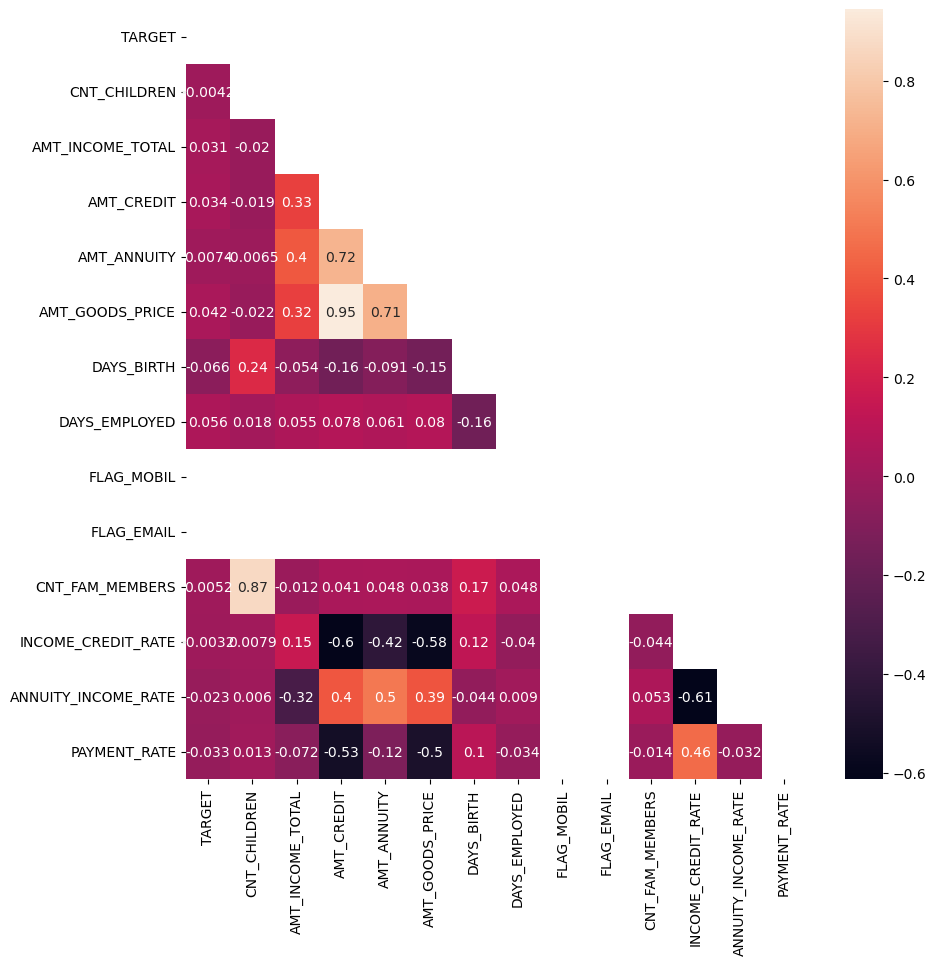

In [37]:
plt.figure(figsize=(10,10))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True)

In [59]:
df = df.set_index('SK_ID_CURR')
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           0         Cash loans           M            N   
100003           1         Cash loans           F            N   
100004           1    Revolving loans           M            Y   
100006           1         Cash loans           F            N   
100007           1         Cash loans           M            N   
...            ...                ...         ...          ...   
456248           1         Cash loans           F            N   
456251           1         Cash loans           M            N   
456253           1         Cash loans           F            N   
456254           0         Cash loans           F            N   
456255           1         Cash loans           F            N   

           FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                              
100002                   Y          0.0          202500.0    406597.5   
100003                   N          0.0          270000.0   1293502.5   
100004                   Y          0.0           67500.0    135000.0   
100006                   Y          0.0          135000.0    312682.5   
100007                   Y          0.0          121500.0    513000.0   
...                    ...          ...               ...         ...   
456248                   Y          0.0          153000.0    331920.0   
456251                   N          0.0          157500.0    254700.0   
456253                   Y          0.0          153000.0    677664.0   
456254                   Y          0.0          171000.0    370107.0   
456255                   N          0.0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ...  NAME_HOUSING_TYPE DAYS_BIRTH  \
SK_ID_CURR                                ...                                 
100002          24700.5         351000.0  ...  House / apartment      -9461   
100003          35698.5        1129500.0  ...  House / apartment     -16765   
100004           6750.0         135000.0  ...  House / apartment     -19046   
100006          29686.5         297000.0  ...  House / apartment     -19005   
100007          21865.5         513000.0  ...  House / apartment     -19932   
...                 ...              ...  ...                ...        ...   
456248          16096.5         225000.0  ...  House / apartment     -16705   
456251          27558.0         225000.0  ...       With parents      -9327   
456253          29979.0         585000.0  ...  House / apartment     -14966   
456254          20205.0         319500.0  ...  House / apartment     -11961   
456255          49117.5         675000.0  ...  House / apartment     -16856   

           DAYS_EMPLOYED FLAG_MOBIL FLAG_EMAIL CNT_FAM_MEMBERS  \
SK_ID_CURR                                                       
100002             637.0        1.0        0.0             1.0   
100003            1188.0        1.0        0.0             2.0   
100004             225.0        1.0        0.0             1.0   
100006            3039.0        1.0        0.0             2.0   
100007            3038.0        1.0        0.0             1.0   
...                  ...        ...        ...             ...   
456248             200.0        1.0        0.0             1.0   
456251             236.0        1.0        0.0             1.0   
456253             200.0        1.0        0.0             1.0   
456254            4786.0        1.0        0.0             2.0   
456255            1262.0        1.0        0.0             2.0   

                 ORGANIZATION_TYPE INCOME_CREDIT_RATE ANNUITY_INCOME_RATE  \
SK_ID_CURR                                                                  
100002      Business Entity Type 3           0.498036            0.121978   
100003                      School           0.208736            0.132217   
100004  

In [60]:
# Save cleaned data

df.to_csv('cleaned_data.csv', index=True, index_label='SK_ID_CURR')

# Preprocess data

In [38]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
df

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           0         Cash loans           M            N   
100003           1         Cash loans           F            N   
100004           1    Revolving loans           M            Y   
100006           1         Cash loans           F            N   
100007           1         Cash loans           M            N   
...            ...                ...         ...          ...   
456248           1         Cash loans           F            N   
456251           1         Cash loans           M            N   
456253           1         Cash loans           F            N   
456254           0         Cash loans           F            N   
456255           1         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y           0.0          202500.0    406597.5   
100003                   N           0.0          270000.0   1293502.5   
100004                   Y           0.0           67500.0    135000.0   
100006                   Y           0.0          135000.0    312682.5   
100007                   Y           0.0          121500.0    513000.0   
...                    ...           ...               ...         ...   
456248                   Y           0.0          153000.0    331920.0   
456251                   N           0.0          157500.0    254700.0   
456253                   Y           0.0          153000.0    677664.0   
456254                   Y           0.0          171000.0    370107.0   
456255                   N           0.0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ...  NAME_HOUSING_TYPE DAYS_BIRTH  \
SK_ID_CURR                                ...                                 
100002          24700.5         351000.0  ...  House / apartment      -9461   
100003          35698.5        1129500.0  ...  House / apartment     -16765   
100004           6750.0         135000.0  ...  House / apartment     -19046   
100006          29686.5         297000.0  ...  House / apartment     -19005   
100007          21865.5         513000.0  ...  House / apartment     -19932   
...                 ...              ...  ...                ...        ...   
456248          16096.5         225000.0  ...  House / apartment     -16705   
456251          27558.0         225000.0  ...       With parents      -9327   
456253          29979.0         585000.0  ...  House / apartment     -14966   
456254          20205.0         319500.0  ...  House / apartment     -11961   
456255          49117.5         675000.0  ...  House / apartment     -16856   

           DAYS_EMPLOYED FLAG_MOBIL  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR                                                         
100002             637.0        1.0         0.0              1.0   
100003            1188.0        1.0         0.0              2.0   
100004             225.0        1.0         0.0              1.0   
100006            3039.0        1.0         0.0              2.0   
100007            3038.0        1.0         0.0              1.0   
...                  ...        ...         ...              ...   
456248             200.0        1.0         0.0              1.0   
456251             236.0        1.0         0.0              1.0   
456253             200.0        1.0         0.0              1.0   
456254            4786.0        1.0         0.0              2.0   
456255            1262.0        1.0         0.0              2.0   

                 ORGANIZATION_TYPE  INCOME_CREDIT_RATE  ANNUITY_INCOME_RATE  \
SK_ID_CURR                                                                    
100002      Business Entity Type 3            0.498036             0.121978   
100003                      School      

In [39]:
# Split Dataset/target

X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [40]:
X.columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'INCOME_CREDIT_RATE',
 'ANNUITY_INCOME_RATE',
 'PAYMENT_RATE']

### Label Encoding categorical features

In [41]:
#list of categorical features to be encoded
list_cat_to_encode = [
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE'
]

#list of indices of categorical features to be encoded
categorical_features_idxs = []
for i in list_cat_to_encode:
    categorical_features_idxs.append(X.columns.tolist().index(i))

categorical_features_idxs

[2, 3, 0, 1, 11, 12, 18, 9, 10]

In [42]:
importlib.reload(utils)

X, classes_names_dict, transformers_dict = utils.label_enc(X, categorical_features_idxs)

In [43]:
# Create dictionary containg list of features

list_features_dict = {
    'all_features': X.columns.tolist(),
    'continuous_features': List_continuous,
    'categorical_features': List_categorical,
    'categorical_features_to_encode': list_cat_to_encode
}

# Save to pickle format
#pickle.dump(list_features_dict, open('API/Pickled_objects/features.pkl', 'wb'))

NameError: name 'List_continuous' is not defined

In [44]:
from sklearn.model_selection import train_test_split

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

data_splitted = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Dummy Classifier

Accuracy:  0.9121232577532462
AUROC:  0.5


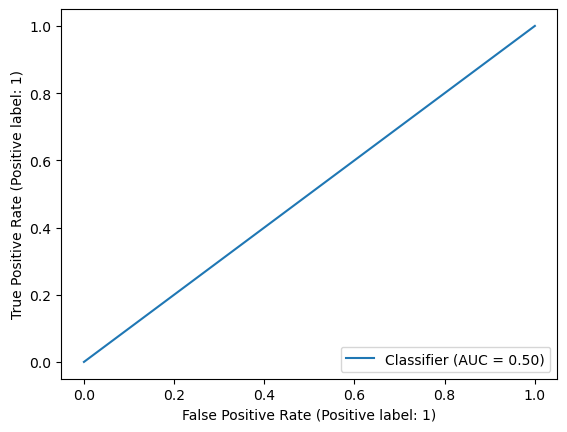

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

dummy_predict = dummy_clf.predict(X_test.values)
print("Accuracy: ", dummy_clf.score(dummy_predict, y_test))
print("AUROC: ", roc_auc_score(y_test, dummy_predict))


RocCurveDisplay.from_predictions(y_test, dummy_predict)

# Logistic regression with Random oversampling - AUC

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 0.0055000000000000005, 'classification__max_iter': 40, 'classification__tol': 1e-08}
Best mean score:  0.6484991640152006
std:  0.005902162798408228
ROC AUC (Logistic regression):  0.6078704005165187


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


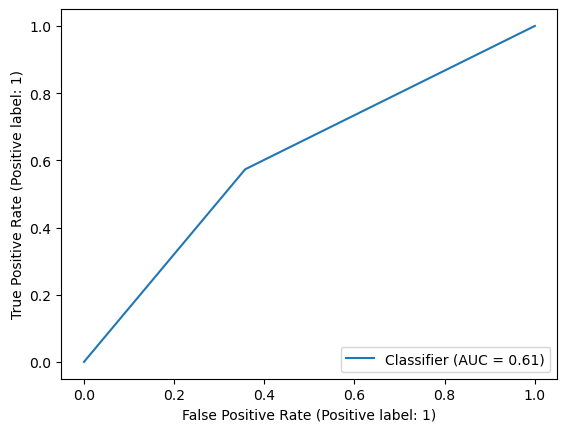

In [31]:
importlib.reload(utils)

from imblearn.pipeline import Pipeline as imbpipe
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

par_grid = {
    'classification__tol': np.logspace(-8, -5, 4),
    'classification__C': np.linspace(0.001, 0.01, 5),
    'classification__max_iter': [40, 50, 60]
}

LogReg = utils.train_model(data_splitted, classifier, par_grid, 'roc_auc')
LogReg_predict = LogReg.predict(X_test.values)

print("ROC AUC (Logistic regression): ", roc_auc_score(y_test, LogReg_predict))
RocCurveDisplay.from_predictions(y_test, LogReg_predict)

# Random Forest - AUC

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best hyperparams:  {'classification__max_depth': 10, 'classification__max_features': 'log2', 'classification__min_samples_leaf': 1, 'classification__min_samples_split': 2}
Best mean score:  0.678042278473934
std:  0.006345265546645676


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ROC AUC (Random Forest):  0.6222087209372094


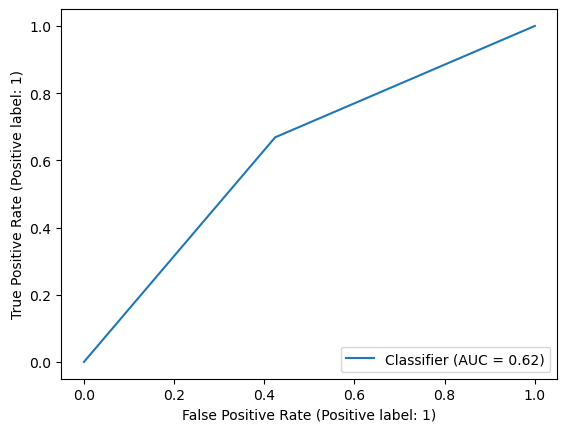

In [32]:
importlib.reload(utils)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

par_grid = {
    'classification__max_depth': [10, 25, 50],
    'classification__min_samples_split': [2, 3, 5],
    'classification__max_features': ['sqrt', 'log2'],
    'classification__min_samples_leaf': [1, 3, 5]
}


rf = utils.train_model(data_splitted, classifier, par_grid, 'roc_auc')
rf_predict = rf.predict(X_test.values)

print("ROC AUC (Random Forest): ", roc_auc_score(y_test, rf_predict))
RocCurveDisplay.from_predictions(y_test, rf_predict)

# XGBoost - AUC

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparams:  {'classification__colsample_bytree': 0.5, 'classification__learning_rate': 0.1, 'classification__max_depth': 5}
Best mean score:  0.6978284539392179
std:  0.005504090550986943
ROC AUC (XGBoost):  0.6444828083783226


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


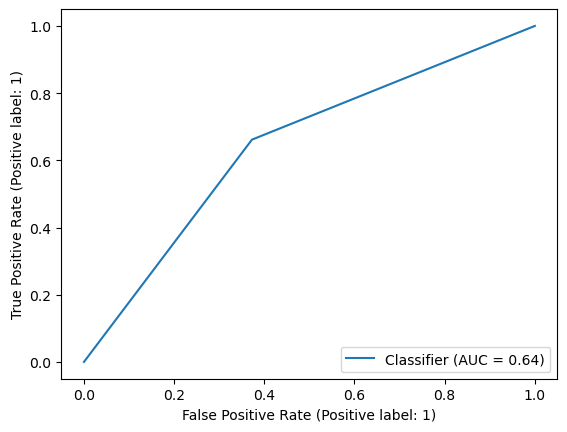

In [33]:
importlib.reload(utils)
from xgboost import XGBClassifier

classifier = XGBClassifier()

par_grid = {
    'classification__max_depth': [5, 10, 15],
    'classification__learning_rate': [.05, .1, .3, .5],
    'classification__colsample_bytree': [.5, .66, .75]
}


xgb = utils.train_model(data_splitted, classifier, par_grid, 'roc_auc')
xgb_predict = xgb.predict(X_test.values)

print("ROC AUC (XGBoost): ", roc_auc_score(y_test, xgb_predict))
RocCurveDisplay.from_predictions(y_test, xgb_predict)

# XGBoost - Custom metric

In [13]:
importlib.reload(utils)
from sklearn.metrics import make_scorer, fbeta_score
from xgboost import XGBClassifier

beta = .1
scoring_fn = utils.score_func
custom_scoring_func = make_scorer(scoring_fn, beta=beta, greater_is_better=True)

classifier = XGBClassifier(n_estimators=80, random_state=42)

par_grid = {
    'classification__max_depth': [3],
    'classification__learning_rate': [.33, .35, .38],
    'classification__colsample_bytree': [.55, .6, .65]
}

xgb_custom = utils.train_model(data_splitted, classifier, par_grid, custom_scoring_func)
xgb_custom_predict = xgb_custom.predict(X_test.values)

utils.score_func(y_test.values, xgb_custom_predict, beta=beta)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparams:  {'classification__colsample_bytree': 0.6, 'classification__learning_rate': 0.35, 'classification__max_depth': 3}
Best mean score:  0.9464916439264398
std:  0.0009281116725142553
Total count:  50366
Correctly predicted as able to pay : 30138 / 45940
Predicted as unable to pay, but able in reality : 15802
Correctly predicted as unable to pay : 2795 / 4426
Predicted as able to pay, but unable in reality : 1631
beta:  0.1
fbeta score:  0.9444893323900658


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.9444893323900658

# Feature importance

#### Global feature importance

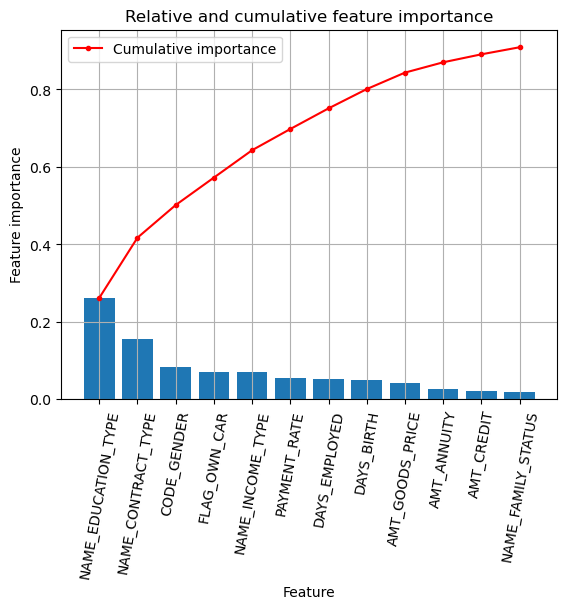

In [45]:
xgb_best = xgb_custom.best_estimator_

importance_xgb = pd.DataFrame.from_dict({
    'name': X.columns.to_list(),
    'feature_imp': xgb_best.named_steps['classification'].feature_importances_
})

importance_xgb = importance_xgb.sort_values(by=['feature_imp'], ascending=False)
cumul_importance = np.cumsum(importance_xgb['feature_imp'].head(12))

#fig, ax = plt.figure(figsize=(10,8))

plt.bar(importance_xgb['name'].head(12), importance_xgb['feature_imp'].head(12))
plt.plot(importance_xgb['name'].head(12), cumul_importance, marker='.', c='r', label='Cumulative importance')

plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.xticks(ticks=np.linspace(0, 11, 12), labels=importance_xgb['name'].head(12), rotation=80)
plt.title('Relative and cumulative feature importance')
plt.legend()
plt.grid()

plt.show()

#### Local feature importance

Prediction :  [1]
Actual :      1


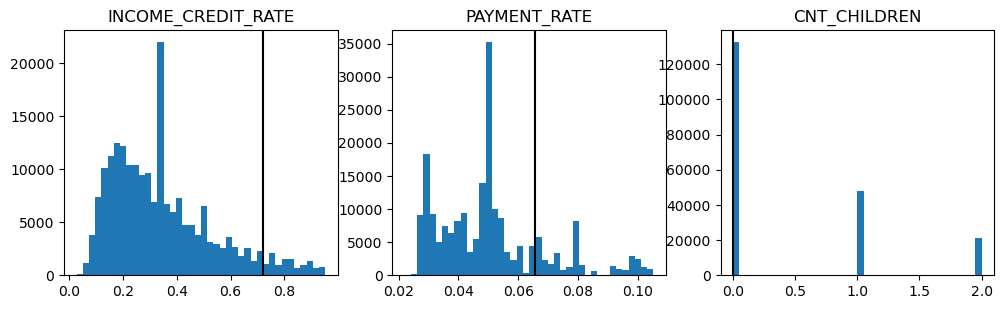

In [48]:
import lime
from lime import lime_tabular
import random

importlib.reload(utils)

idx = random.choice(X_test.index)

exp_details = utils.local_feat_imp(idx, X_train, X_test, y_test, categorical_features_idxs, classes_names_dict, xgb_custom)

j=1
fig = plt.figure(figsize=(12, 7))
for i in range(len(exp_details)):
    if X_test[X_test.columns[exp_details[i][0]]].dtype != 'category':
        ax = fig.add_subplot(2, 3, j)
        #print(X_test.columns[exp_details[i][0]], '\t', X_test[X_test.columns[exp_details[i][0]]].dtype)
        h = ax.hist(X_train[X_train.columns[exp_details[i][0]]], bins=40)
        plt.axvline(X_test.loc[idx, X_test.columns[exp_details[i][0]]], c='k')
        ax.set_title(X_train.columns[exp_details[i][0]])
        j += 1

plt.show()

In [49]:
explainer

# Re training + prep for API

In [30]:
importlib.reload(utils)

df = pd.read_csv('cleaned_data.csv', index_col=0)

X = df.drop('TARGET', axis=1)
y = df['TARGET']

X, classes_names_dict, transformers_dict = utils.label_enc(X, categorical_features_idxs)

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
importlib.reload(utils)

std = StandardScaler()
std.fit_transform(X_train)

transformers_dict['Scaler'] = std

X_train = std.transform(X_train)
X_test = std.transform(X_test)

xgb_best.fit(X_train, y_train)

prediction = xgb_best.predict(X_test)

utils.score_func(y_test.values, prediction, beta=.1)

Total count:  25183
Correctly predicted as able to pay : 15103 / 22985
Predicted as unable to pay, but able in reality : 7882
Correctly predicted as unable to pay : 1360 / 2198
Predicted as able to pay, but unable in reality : 838
beta:  0.1
fbeta score:  0.9433041553165109


0.9433041553165109

In [72]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    mode='classification',
    feature_names=X_train.columns.to_list(),
    categorical_features=categorical_features_idxs,
    categorical_names=classes_names_dict,
    class_names=[0, 1]
)

pred = xgb_best.predict(X_test.loc[idx].values.reshape(1, -1))

print("Prediction : ", pred)
print("Actual :     ", y_test[idx])

exp = explainer.explain_instance(
    X_test.loc[idx],
    xgb_best.predict_proba,
    num_features=6
)

exp.show_in_notebook()

Prediction :  [1]
Actual :      1


In [76]:
#pickle.dump(transformers_dict, open('API/Pickled_objects/transformers.pkl', 'wb'))
#pickle.dump(xgb_best, open('API/Pickled_objects/xgb.pkl', 'wb'))
#pickle.dump(explainer, open('API/Pickled_objects/explainer.pkl', 'wb'))

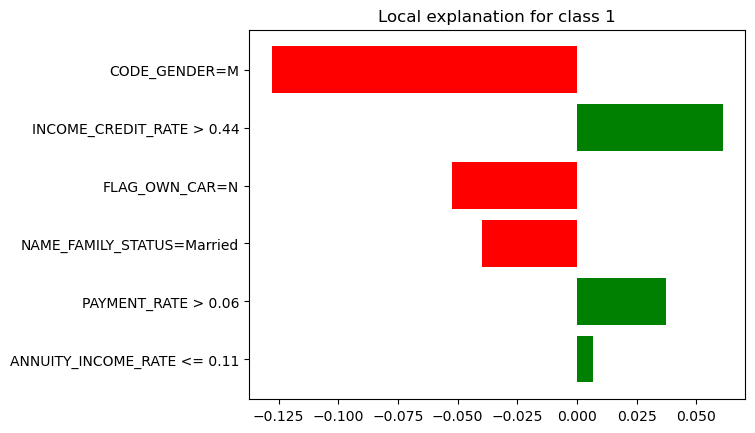

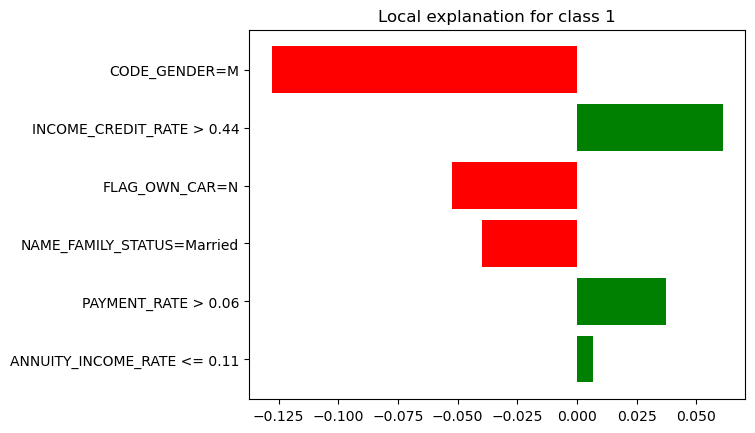

In [77]:
exp.as_pyplot_figure()